# Importación de librerias

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import scipy.stats as stats

from src.image_processing_functions import *
from src.utils_functions import *

# Carga y visualización de imágenes

Visualizamos las imágenes `img1_tp.png` y `img2_tp.png` en escala de grises.

(np.float64(-0.5), np.float64(286.5), np.float64(287.5), np.float64(-0.5))

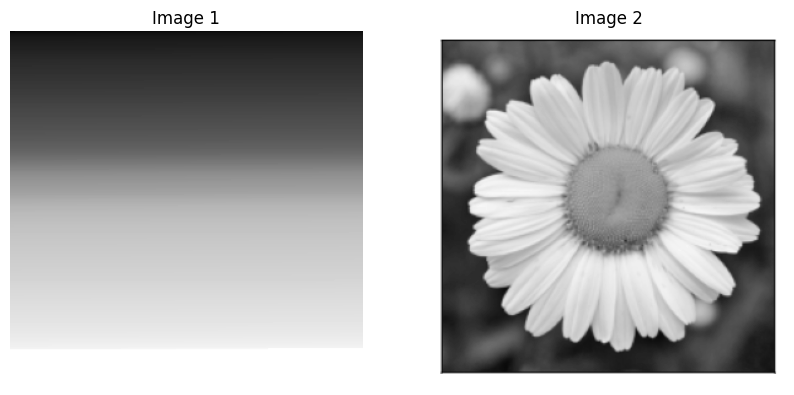

In [2]:
# path to images
path_img1 = 'resources/img1_tp.png'
path_img2 = 'resources/img2_tp.png'
# read images
img1 = cv2.imread(path_img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path_img2, cv2.IMREAD_GRAYSCALE)
# show the images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1, cmap='gray')
axs[0].set_title('Image 1')
axs[0].axis('off')
axs[1].imshow(img2, cmap='gray')
axs[1].set_title('Image 2')
axs[1].axis('off')

# Visualización de histogramas

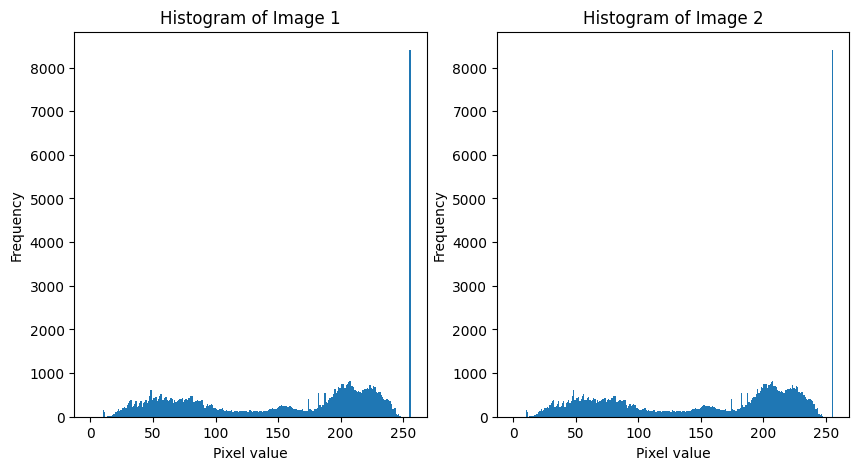

In [3]:
# calculate histograms
img1_hist, _ = np.histogram(img1.ravel(), bins=50, range=[0, 256])
img2_hist, _  = np.histogram(img2.ravel(), bins=50, range=[0, 256])
# show histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(img1.ravel(),256,[0,256])
axs[0].set_title('Histogram of Image 1')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(img2.ravel(),256,[0,256])
axs[1].set_title('Histogram of Image 2')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')

plt.show()

In [4]:
# calculate the difference between the histograms
difference = np.sum(np.abs(img1_hist - img2_hist))
# print the difference
print('Difference between the histograms:', difference)

Difference between the histograms: 0


#### Análisis:

Se observa que la imagen `img1_tp.png` y la imagen `img2_tp.png` tienen la misma distribución de intensidades. Si bien visualmente se observa que ambas imágenes son diferentes, el histograma de ambas imágenes es el mismo. Esto es posible debido a que el histograma solo representa la distribución de intensidades de la imagen, y no el ordenamiento espacial de los píxeles.

Sobre tomar los histogramas como **features** para entrenar un modelo de **clasificación/detección**, lo encontrado en este ejercicio sugiere que no, ya que dos imágenes diferentes pueden tener el mismo histograma. Si tomaramos este caso por ejemplo, un modelo no sería capaz de distinguir entre ambas imágenes, aunque evidentemente son diferentes. Sin embargo, incluir la información del histograma como una característica adicional a otras más representativas de la imagen, como características basadas en formas o texturas, podría ser útil para mejorar el rendimiento del modelo. Aunque, posiblemente esto debería evaluarse para cada caso en particular.

# Segmentación 

Primero se muestra la imagen original

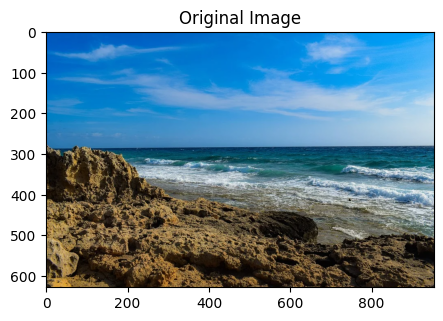

In [5]:
# path to the image
img_path = 'resources/segmentacion.png'
# read the image
original_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plot the image
plt.figure(figsize=(5, 5))
plt.imshow(original_img)
plt.title('Original Image')
plt.show()


## Análisis de histogramas

Se muestran los histogramas de los canales RGB de la imagen `segmentacion.png`. 

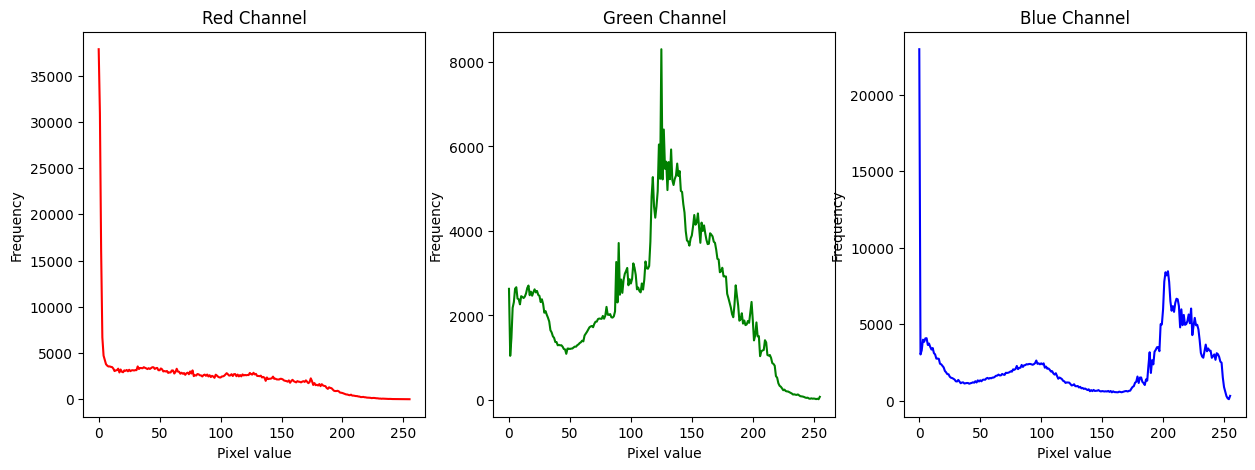

In [6]:
# Calculate the histograms for each channel
hist_r, bins_r = np.histogram(original_img[:, :, 0].ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(original_img[:, :, 1].ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(original_img[:, :, 2].ravel(), 256, [0, 256])

# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(hist_r, color='red')
axs[0].set_title('Red Channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].plot(hist_g, color='green')
axs[1].set_title('Green Channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].plot(hist_b, color='blue')
axs[2].set_title('Blue Channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

#### Análisis:

El histograma del **canal rojo** muestra una alta frecuencia de valores bajos, lo que indica una escasez de áreas predominantemente rojas, algo típico en un paisaje natural sin elementos rojos destacados. En contraste, el **canal verde** presenta un pico amplio alrededor de valores medios, lo que puede estar relacionado con la presencia de agua y la zona verdosa de la costa. El **canal azul** destaca con dos picos principales: uno en valores bajos y otro en el rango alto, señalando la existencia de áreas sombreadas y de regiones brillantes como el cielo y el mar.

-----

También se puede analizar la imagen en el espacio de color **HSV**.

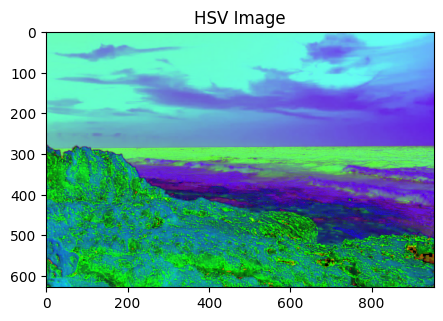

In [30]:
hsv_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(5, 5))
plt.imshow(hsv_img)
plt.title('HSV Image')
plt.show()

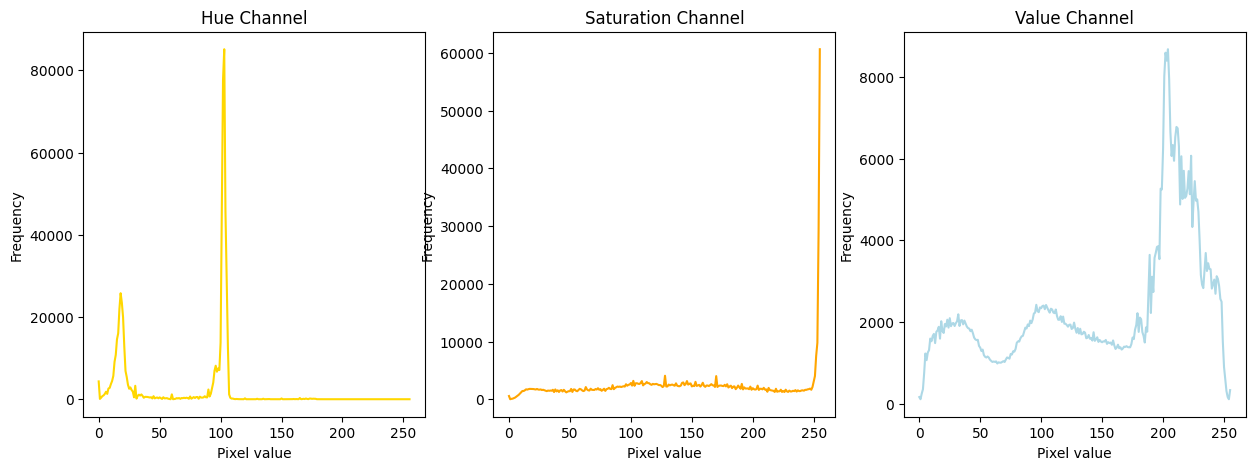

In [31]:
hist_h, bins_h = np.histogram(hsv_img[:, :, 0].ravel(), 256, [0, 256])
hist_s, bins_s = np.histogram(hsv_img[:, :, 1].ravel(), 256, [0, 256])
hist_v, bins_v = np.histogram(hsv_img[:, :, 2].ravel(), 256, [0, 256])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(hist_h, color='gold')
axs[0].set_title('Hue Channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].plot(hist_s, color='orange')
axs[1].set_title('Saturation Channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].plot(hist_v, color='lightblue')
axs[2].set_title('Value Channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

#### Análisis

El histograma del **canal Hue** muestra dos picos principales. El primer pico en valores bajos puede estar asociado con las áreas más oscuras de la imagen o los tonos rojizos y amarillos del paisaje. El segundo pico en valores altos esta al rededor de los valores medios (aproximadamente entre 80 y 100), lo que sugiere la presencia de tonos azules o verdes. El **canal Saturation** presenta una alta frecuencia en los valores altos, lo que sugiere la presencia de colores saturados en la imagen, esto podría estar relacionado con el cielo y partes del mar. Finalmente, el histograma del **canal Value** muestra una distribución amplia con varios picos. El más significativo en valores altos (alrededor de 200), lo que indica áreas muy iluminadas, probablemente el cielo y las partes brillantes del mar.

## Segmentación de regiones (I)

Segmentamos los elementos principales presentes en la imagen (agua, cielo, tierra) y mostramos las regiones en imágenes separadas.

Se utilizará la información de los histogramas para segmentar la imagen. Para segmentar el cielo se utilizará el canal azul (B) donde utilizando el histograma empleado en la sección anterior, se observa que los valores altos estan entre 160 y 255. 

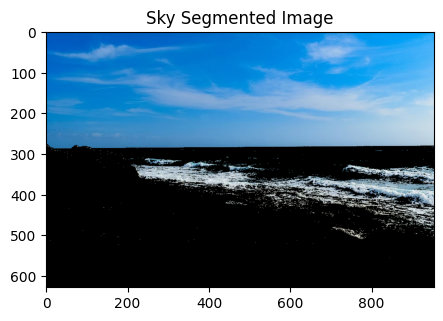

In [24]:
sky_low_th = 160
sky_high_th = 255

_, _, blue_channel_img = cv2.split(original_img)

sky_mask = cv2.inRange(blue_channel_img, sky_low_th, sky_high_th)
sky_segmented = cv2.bitwise_and(original_img, original_img, mask=sky_mask)

plt.figure(figsize=(5, 5))
plt.imshow(sky_segmented)
plt.title('Sky Segmented Image')
plt.show()

Para las regiones de agua y tierra se analizarán primero los histogramas de los canales HSV de la imagen. Para la región de tierra, considerando el análisis de los histogramas correspondientes a la imagen HSV, se sabe que en el canal Hue existe un pico de valores entre 80 y 110, lo cual corresponde a tonos verdes o azules, que podrían estar relacionados al mar, entonces nos desharemos de estos valores. 

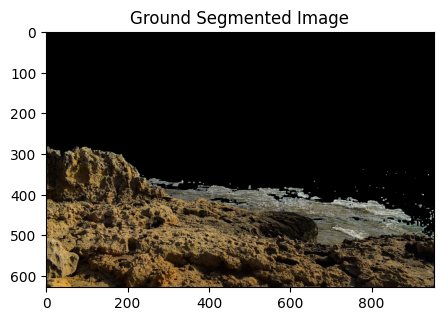

In [33]:
ground_low_th = 80
ground_high_th = 110

hue_channel_img = hsv_img[:, :, 0]

ground_mask = cv2.bitwise_not(cv2.inRange(hue_channel_img, ground_low_th, ground_high_th))
ground_segmented = cv2.bitwise_and(original_img, original_img, mask=ground_mask)

plt.figure(figsize=(5, 5))
plt.imshow(ground_segmented)
plt.title('Ground Segmented Image')
plt.show()

Finalmente, para segmentar el mar utilizaremos el pico de valores entre 80 y 110 del canal Hue, y nos desharemos del pico de valores altos del canal Value, que correspondería a las áreas más iluminadas de la imagen.

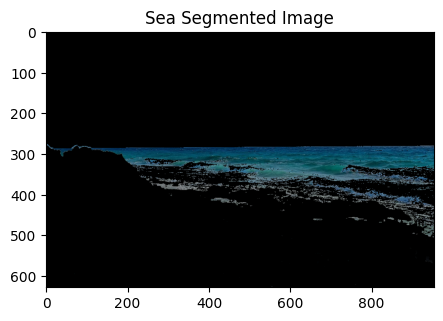

In [47]:
sea_low_th_1 = 160
sea_high_th_1 = 255
sea_low_th_2 = 80
sea_high_th_2 = 110

sea_mask_1 = cv2.inRange(blue_channel_img, sea_low_th_1, sea_high_th_1)
sea_mask_1 = cv2.bitwise_not(sea_mask_1)

sea_mask_2 = cv2.inRange(hue_channel_img, sea_low_th_2, sea_high_th_2)
sea_mask_2 = cv2.bitwise_and(cv2.inRange(hue_channel_img, sea_low_th_2, sea_high_th_2), sea_mask_1)

sea_segmented = cv2.bitwise_and(original_img, original_img, mask=sea_mask_2)

plt.figure(figsize=(5, 5))
plt.imshow(sea_segmented)
plt.title('Sea Segmented Image')
plt.show()

Ahora podemos combinar las tres máscaras para obtener la imagen segmentada final.

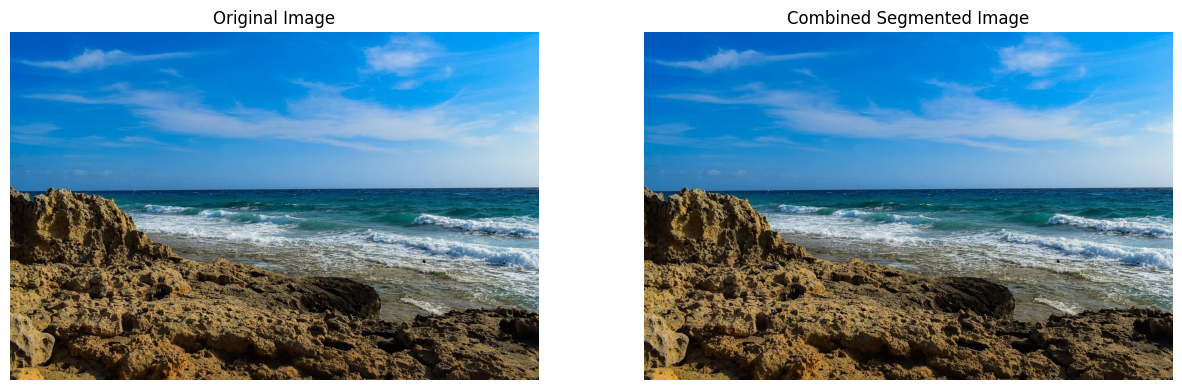

In [54]:
# Combine the segmented images
combined_segmented_img = np.zeros_like(original_img)
combined_segmented_img[sky_mask > 0] = original_img[sky_mask > 0]
combined_segmented_img[ground_mask > 0] = original_img[ground_mask > 0]
combined_segmented_img[sea_mask_2 > 0] = original_img[sea_mask_2 > 0]

# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(combined_segmented_img)
axs[1].set_title('Combined Segmented Image')
axs[1].axis('off')

plt.show()

Pintaremos con colores solidos las regiones segmentadas para una mejor visualización.

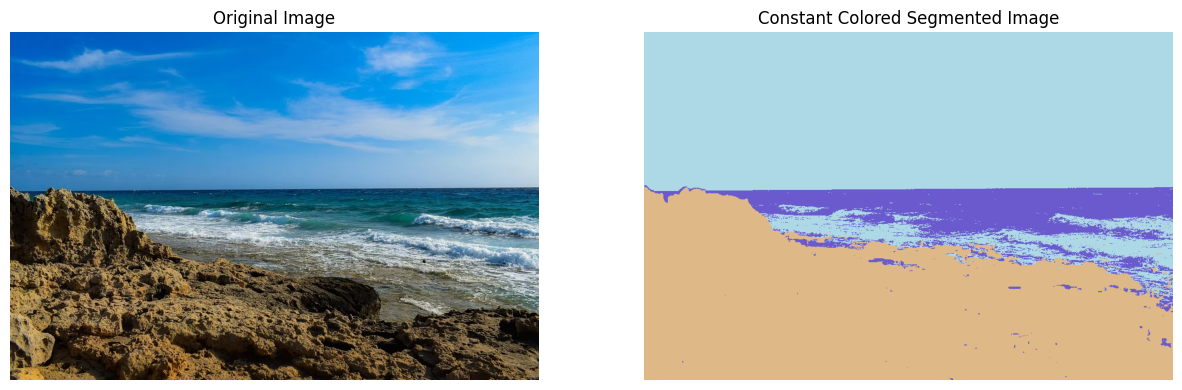

In [55]:
# Paint each region with a constant color
constant_colored_img = np.zeros_like(original_img)

sky_color = [173, 216, 230]
sea_color = [106, 90, 205]
ground_color = [222, 184, 135]

constant_colored_img[sky_mask > 0] = sky_color
constant_colored_img[ground_mask > 0] = ground_color
constant_colored_img[sea_mask_2 > 0] = sea_color

# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(constant_colored_img)
axs[1].set_title('Constant Colored Segmented Image')
axs[1].axis('off')

plt.show()

## Segmentación de regiones (II)

En este procedimiento se utilizará una técnica de *sliding window* para recorrer la imagen por regiones. En cada ventana, se calculará el valor promedio de los canales de color RGB. A partir de estos valores promedio, se obtendrán la media y la desviación estándar para cada canal de color en toda la región especificada. Finalmente, estos parámetros se utilizarán para definir los umbrales de segmentación.

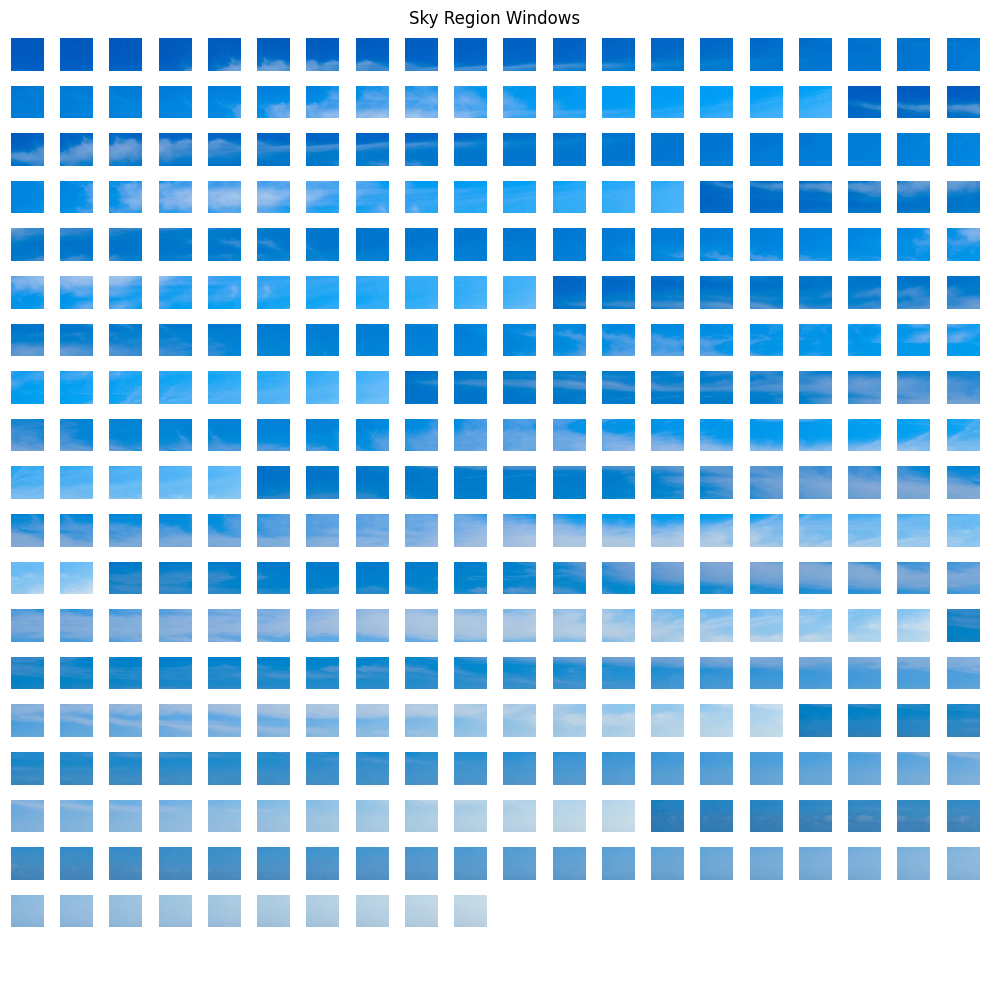

In [7]:
# Segment sky region
sky_segmented, sky_mask, sky_windows = segment_region(original_img, 0, original_img.shape[1], 0, 230)
plot_windows(sky_windows, title="Sky Region Windows")

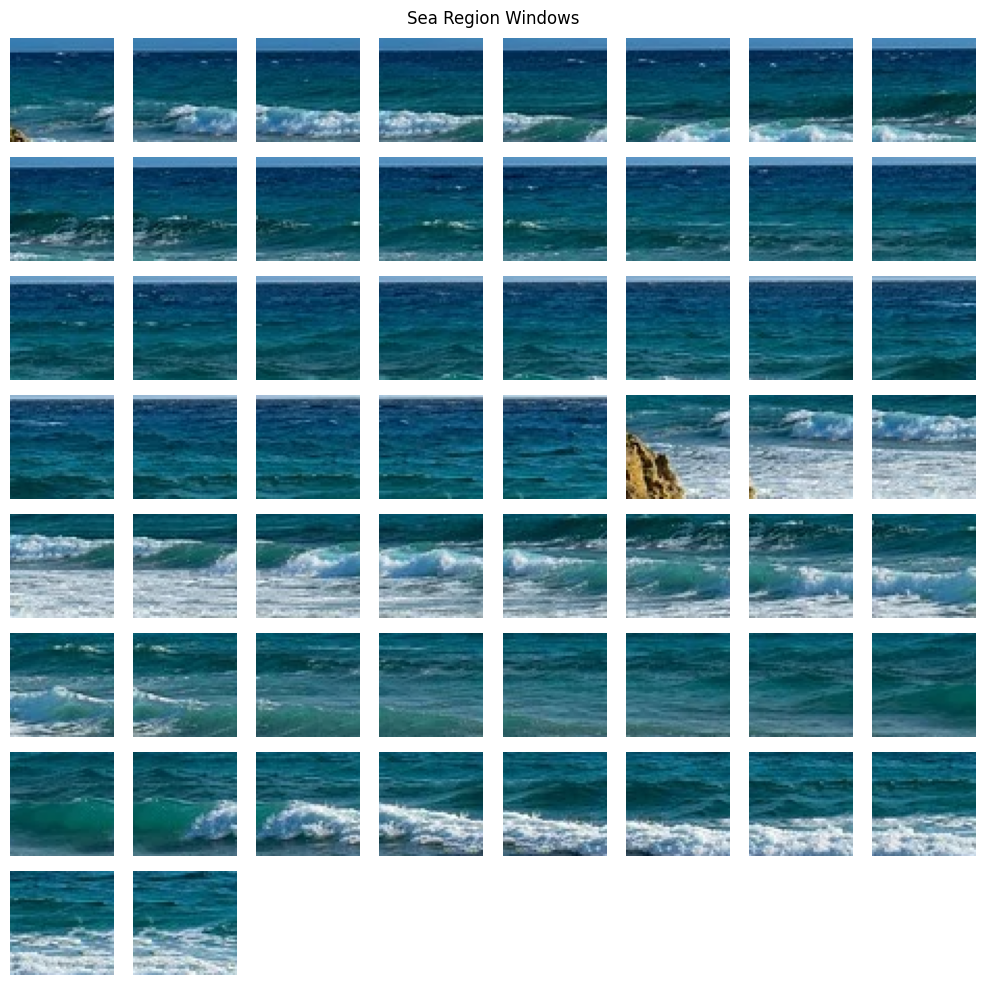

In [8]:
# Segment sea region
sea_segmented, sea_mask, sea_windows = segment_region(original_img, 200, original_img.shape[1], 280, 320)
plot_windows(sea_windows, title="Sea Region Windows")

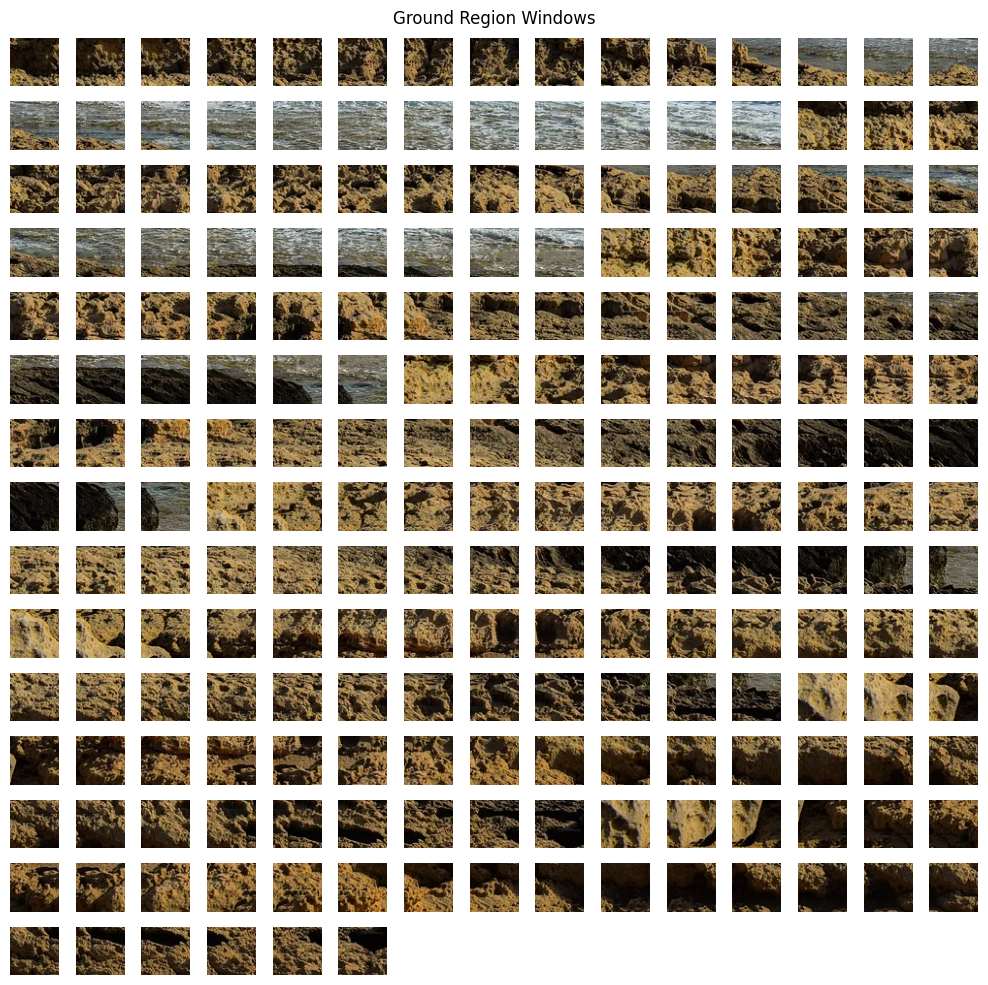

In [9]:
# Segment ground region
ground_segmented, ground_mask, ground_windows = segment_region(original_img, 0, 670, 380, original_img.shape[0])
plot_windows(ground_windows, title="Ground Region Windows")

La segmentación se realizará utilizando los umbrales antes calculados, para crear una máscara que resalte las áreas de la imagen cuyos valores de color se encuentran dentro del rango definido por dos desviaciones estándar alrededor de la media.

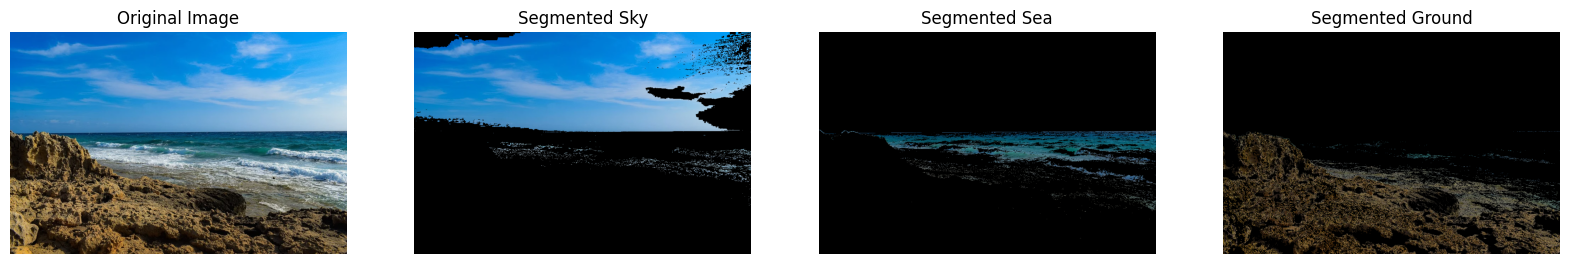

In [10]:
# Combine the masks
combined_mask = sky_mask | sea_mask | ground_mask

# Create the combined segmented image
combined_segmented_img = np.zeros_like(original_img)
combined_segmented_img[sky_mask] = original_img[sky_mask]
combined_segmented_img[sea_mask] = original_img[sea_mask]
combined_segmented_img[ground_mask] = original_img[ground_mask]

# Display the segmented images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sky_segmented)
axs[1].set_title('Segmented Sky')
axs[1].axis('off')

axs[2].imshow(sea_segmented)
axs[2].set_title('Segmented Sea')
axs[2].axis('off')

axs[3].imshow(ground_segmented)
axs[3].set_title('Segmented Ground')
axs[3].axis('off')

plt.show()

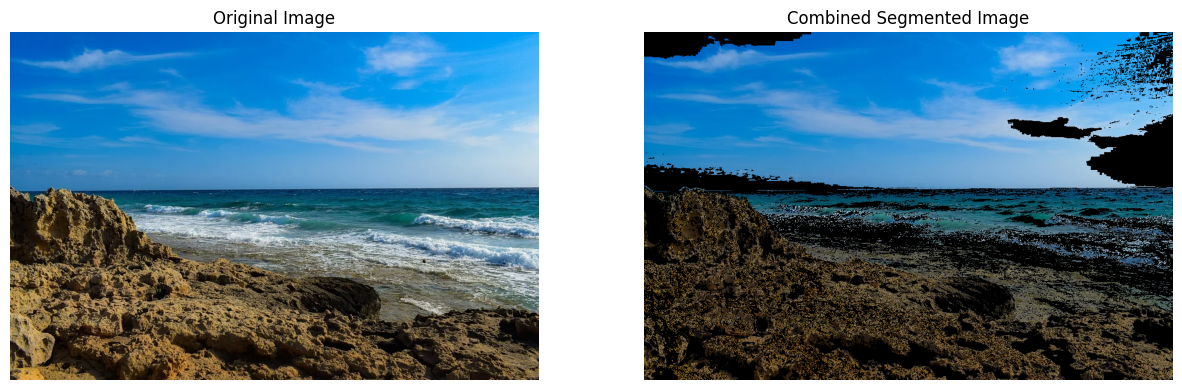

In [11]:
# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(combined_segmented_img)
axs[1].set_title('Combined Segmented Image')
axs[1].axis('off')

plt.show()

En la comparación entre las imágenes segmentadas y la imagen original, se observa que la segmentación se ha realizado de manera que se pueda cubrir las mayores porciones de cada región. Sin embargo, quedan detalles que no han podido ser segmentados correctamente, como pueden ser tonos muy oscuros o muy claros que no llegaron a ajustarse a los umbrales establecidos. 

Para apreciar mejor visualmente las regiones segmentadas, se pintarán las regiones segmentadas con colores sólidos. 

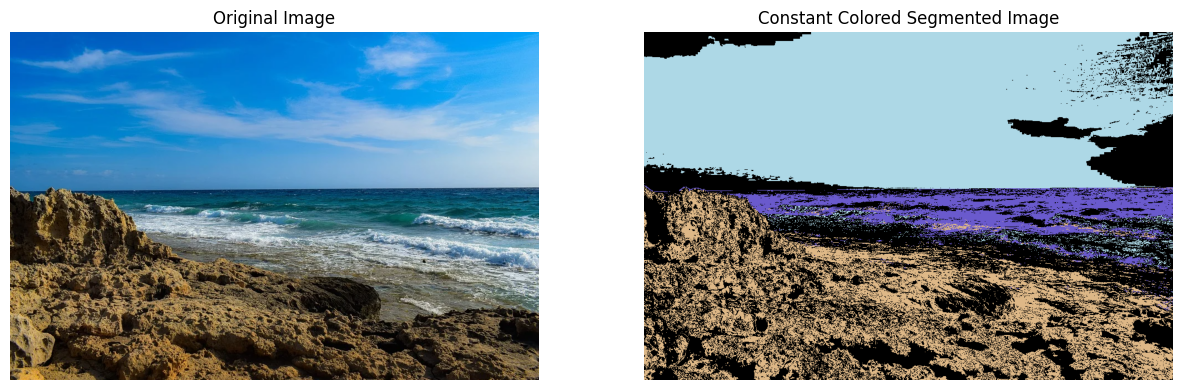

In [12]:
# Paint each region with a constant color
constant_colored_img = np.zeros_like(original_img)

sky_color = [173, 216, 230]
sea_color = [106, 90, 205]
ground_color = [222, 184, 135]

constant_colored_img[sky_mask] = sky_color
constant_colored_img[sea_mask] = sea_color
constant_colored_img[ground_mask] = ground_color

# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(constant_colored_img)
axs[1].set_title('Constant Colored Segmented Image')
axs[1].axis('off')

plt.show()